## Introducción a Estadística y Probabilidad

- Definiciones de Probabilidad
- Axiomas clásicos de la probabilidad
- Definiciones de Estadística
- Medidas de tendencia central
  - Media o promedio
  - Mediana
  - Moda o modo
- Medidas de dispersión
  - Rango
  - Varianza
  - Desvio Estandar
- Medidas de asociación
  - Covarianza
  - Correlación
- Ley de grandes números
- Teorema del Límite Central
- MyPersonality



In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
%matplotlib inline

## **Definiciones de Probabilidad**

---
* **Experimento** - un experimento o ensayo es un procedimiento que puede ser repetido infinitas veces y tiene un conjunto de salidas posibles bien definidas, conocido como espacio muestral.
    * Ejemplo: tirar una moneda dos veces
* **Espacio muestral ($\Omega$)** - posibles resultados de un experimento
    * Ejemplo (moneda): {CC, CS, SC, SS} (C = Cara, S = Seca)
* **Evento** - Un subconjunto de salidas posibles
    * Ejemplo (moneda): A = {CC} , B= {CS, SS}

In [ ]:
# Frecuencia de un evento = Cantidad de ocurrencias de ese evento / todos los eventos posibles

In [ ]:
import numpy as np

def tirar_dado():
  return np.random.randint(1,7)

In [ ]:
tirar_dado()

5

Ejercicio:

Tirar dado 1000 veces y guardar los resultados en una lista llamada "resultados"

In [ ]:
resultados = [tirar_dado() for i in range(100000)]

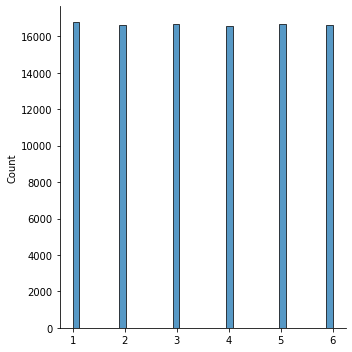

In [ ]:
sns.displot(resultados);

## **Medidas de tendencia central**

### Media o promedio

Valor medio de nuestro conjunto de valores. Se consigue mediante la suma de los valores dividida la cantidad de estos: $${{\mu}= {\overline {x}} = {\frac {1}{n}}\sum _{i=1}^{n}x_{i}={\frac {x_{1}+x_{2}+\cdots +x_{n}}{n}}}$$

Ejercicio: tirar el dado 10 veces y calcular el promedio

In [ ]:
resultados = []

for i in range(10000):
  resultados.append(tirar_dado())

sum(resultados)/len(resultados)

3.4812

### Mediana
Representa el valor de posición central en un conjunto de datos ordenados.

### Moda o modo
Valor que tiene mayor frecuencia absoluta. Son los picos que vemos en el histograma. Dependiendo de la la distribución de los datos puede existir más de una

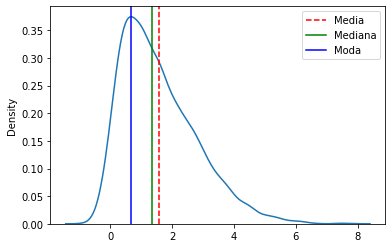

In [ ]:
#@title Medidas de Tendencia Central 
#@markdown Ejemplo distribucion asimétrica 

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skewnorm, mode, gaussian_kde

data = skewnorm.rvs(7, loc=0, scale=2, size=10000)
ax = sns.kdeplot(data)

def get_mode(data):
  '''Para datos continuos'''
  density = gaussian_kde(data)
  xs = np.linspace(-1,1,100)
  ys = density(xs)
  index = np.argmax(ys)
  max_x = xs[index]
  return max_x

plt.axvline(np.mean(data), color='r', linestyle='--', label='Media')
plt.axvline(np.median(data), color='g', linestyle='-', label='Mediana')
plt.axvline(get_mode(data), color='b', linestyle='-', label='Moda')
plt.legend()
plt.show();

## **Ley de grandes números**

La ley débil de los grandes números establece que si $X_1, X_2, X_3, ...$ es una sucesión infinita de variables aleatorias independientes que tienen el mismo valor esperado $\mu$ y varianza $\sigma^2$, entonces el promedio $\overline{X}_n=(X_1+\cdots+X_n)/n$ converge en probabilidad a $μ$.




$$ {\displaystyle \lim _{n\rightarrow \infty }\operatorname {P} \left(\left|{\overline {X}}_{n}-\mu \right|<\varepsilon \right)=1.} $$

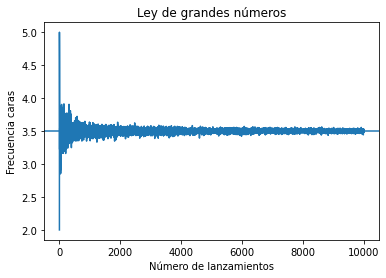

In [ ]:
resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([1,2,3,4,5,6], lanzamientos) 
    dados = lanzamientos.mean()
    resultados.append(dados)

plt.plot(resultados)
plt.title('Ley de grandes números')
plt.axhline(3.5)
plt.xlabel("Número de lanzamientos")
plt.ylabel("Frecuencia caras")
plt.show()

¿Qué pasa si tomamos de a dos dados?

In [ ]:
from itertools import product
espacio = [roll for roll in product([1,2,3,4,5,6], repeat = 2)]
print(*espacio, sep='\n')
totales = [sum(roll) for roll in espacio]

(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(6, 1)
(6, 2)
(6, 3)
(6, 4)
(6, 5)
(6, 6)


## **Teorema del Límite Central**

El teorema del límite central o teorema central del límite indica que, en condiciones muy generales, si $S_n$ es la suma de $n$ variables aleatorias independientes, con media conocida y varianza no nula pero finita, entonces la función de distribución de $S_n$ «se aproxima bien» a una distribución normal


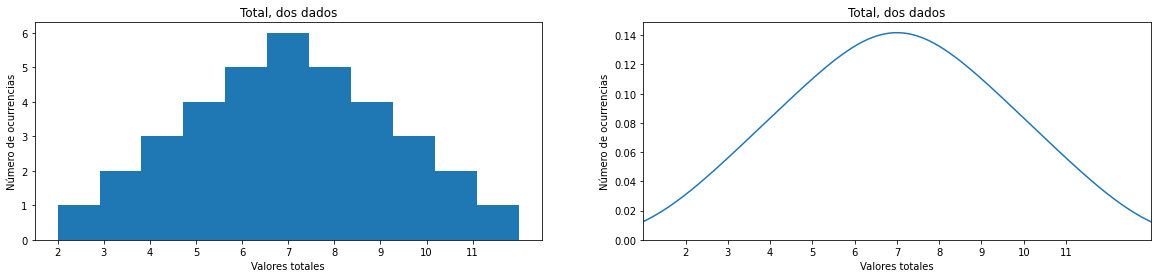

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Graficamos la distribución
plt.figure(figsize = (20, 4))
plt.subplot(121)
plt.hist(totales, bins = 11)
plt.title('Total, dos dados')
plt.xlabel('Valores totales')
plt.ylabel('Número de ocurrencias')
plt.xticks(range(2, 12))
plt.subplot(122)
ax = sns.kdeplot(np.array(totales))
ax.set(xlabel = 'Valores totales', ylabel = 'Número de ocurrencias', 
      title = 'Total, dos dados', xticks = range(2, 12),
      xlim = (1, 13));

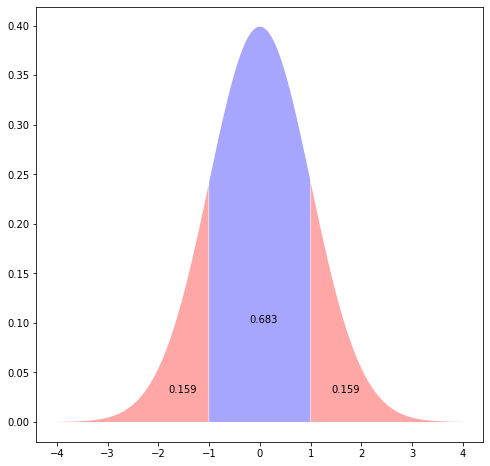

In [ ]:
#@title Distribución normal
#@markdown y la "regla empírica"

# https://www.kaggle.com/hamelg/python-for-data-22-probability-distributions

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.rcParams["figure.figsize"] = (8,8)
                                  
prob_under_minus1 = stats.norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)     

prob_over_1 = 1 - stats.norm.cdf(x= 1,  
                                loc = 0,               
                                scale= 1) 

between_prob = 1-(prob_under_minus1+prob_over_1)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

## **Axiomas clásicos de la probabilidad**

* **Probabilidad de un evento** - Número asignado a un evento
  * Ejemplo (moneda): $Pr(A) = \frac{1}{4}$

* **Axiomas**:
    1. $0 \le Pr(A) \leq 1$
    2. $Pr(\Omega) = 1 $
    3. $Pr(A \cup B) = Pr(A) + Pr(B) - P(A \cap B)$ (si $A, B$ son independientes $P(A \cap B) = 0$)

---
*¿Cuál es la probabilidad de sacar un número par **o** un número que sea múltiplo de 3?*

* $S = \{1, 2, 3, 4, 5, 6\}$
* $ P(A=par) = \frac{3}{6} = 0.5$
* $ P(B=\textit{multiplo de 3}) = \frac{2}{6} = \frac{1}{3}$
* $ P(A \cap B) = \frac{1}{6}$, ya que $ A \cap B = \{6\}$
* $\rightarrow P(A \cup B) = \frac{3}{6} + \frac{2}{6} - \frac{1}{6} = \frac{4}{6} = \frac{2}{3} $

## **Definiciones de Estadística**

---
| Definición | Descripción | Tipos | Ejemplo  |
| --- | --- | --- | --- |
| **Población** |  Todos los valores posibles, el conjunto completo del que se extrae una muestra estadística. Por tanto, se puede decir que una población es una observación agregada de sujetos agrupados por una característica común. |  |  Un grupo completo de personas, objetos, eventos, visitas al hospital o mediciones. |
| **Muestra** |Una porción de la población, una selección aleatoria de miembros de una población. Es un grupo más pequeño extraído de la población que tiene las características de toda la población. Las observaciones y conclusiones extraídas de los datos de la muestra se atribuyen a la población. | | 1.000 participantes de un total de 200.000 participantes de la prueba |
| **Inferencia estadística** | Generalización de una muestra a una población con un grado de certeza calculado | 1. Prueba de hipótesis (hoy) <br> 2. Estimación (tutorial anterior) |  |
| **Parámetro** | Una característica de la población, cualquier cantidad numérica que caracteriza a una población determinada o algún aspecto de ella. Esto significa que el parámetro nos dice algo sobre toda la población. | | Media poblacional $\mu$ |
| **Estadístico** | Calculado a partir de los datos de la muestra, una única medida de algún atributo de una muestra. Se calcula aplicando una función (algoritmo estadístico) a los valores de los elementos de la muestra, que se conocen en conjunto como un conjunto de datos. | | Promedio de la muestra $\overline{X}$ |

---
1. **Hipótesis nula o alternativa** -  Formule la hipótesis nula $ H_0 $ (que las observaciones son el resultado del azar puro) y la hipótesis alternativa $ H_a $ (que las observaciones muestran un efecto real combinado con un componente de variación aleatoria).

2. **Test estadístico** - Identifique un estadístico de prueba que pueda usarse para evaluar la verdad de la hipótesis nula. Es un valor calculado a partir de datos de muestra. La estadística de prueba se utiliza para evaluar la solidez de la evidencia en apoyo de una hipótesis nula.

3. **P-valor & Interpetación** - Calcule el valor P, que es la probabilidad de que se obtenga un estadístico de prueba, al menos tan significativo como el observado, suponiendo que la hipótesis nula sea cierta. Cuanto menor sea el valor P, más fuerte será la evidencia **en contra** de la hipótesis nula.

4. **Nivel de significancia** - Compare el valor p con un valor de significancia aceptable $ \ alpha $ (a veces llamado valor $ \ alpha $, un umbral de probabilidad por debajo del cual se rechazará la hipótesis nula. Los valores comunes son 5% y 1%). Si $ p \ leq \ alpha $ (el efecto observado es estadísticamente significativo), la hipótesis nula se descarta y la hipótesis alternativa es válida.

## **Medidas de dispersión**

### Rango
Valor numérico que indica la diferencia entre el valor máximo y el mínimo de una población o muestra estadística.

$$ Max - Min $$


In [ ]:
tiempos_de_reaccion = [3.2, 4.3, 1, 4.5, 6, 3, 10]

In [ ]:
def rango(lista):
  return max(lista) - min(lista)

rango(tiempos_de_reaccion)

9

### Varianza

La varianza es una medida de la dispersión de una distribución. La varianza de una variable aleatoria  representa *cuánto se espera* que la variable aleatoria $x$ varíe con respecto al promedio ($\mu$).


$$\sigma _{n}^{2}={\frac {1}{n - 1}}\sum _{i=1}^{n}\left(x_{i}-{\overline {x}}\right)^{2}$$

In [ ]:
promedio = 3.5
total = 0
for x in resultados:
  v = (x - promedio) ** 2
  total += v

total / (len(resultados) - 1)

2.9084908490849086

### Desvio Estandar
Medida que se utiliza para cuantificar la variación o la dispersión de un conjunto de datos numéricos

$${\sigma={\sqrt {{\frac {1}{n}}\sum _{i=1}^{n}\left(x_{i}-{\overline {x}}\right)^{2}}}}$$ 

In [ ]:
def sd(lista):
  pass

### Covarianza
Valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias.

$${\displaystyle s_{xy}={1 \over n}\sum _{i=1}^{n}{(x_{i}-{\overline {x}})(y_{i}-{\overline {y}})}}$$



### Correlación

El coeficiente de correlación de Pearson indica la relación entre dos variables, independientemente de sus unidades ya que esta normalizado según las desviaciónes de las variables. El r va desde -1 hasta 1. Qué significan estos valores?

$${r_{xy}={\frac {\sum (x_{i} - {\bar {x})(y_{i} - {\bar {y})}}}{(n-1)s_{x}s_{y}}}}$$

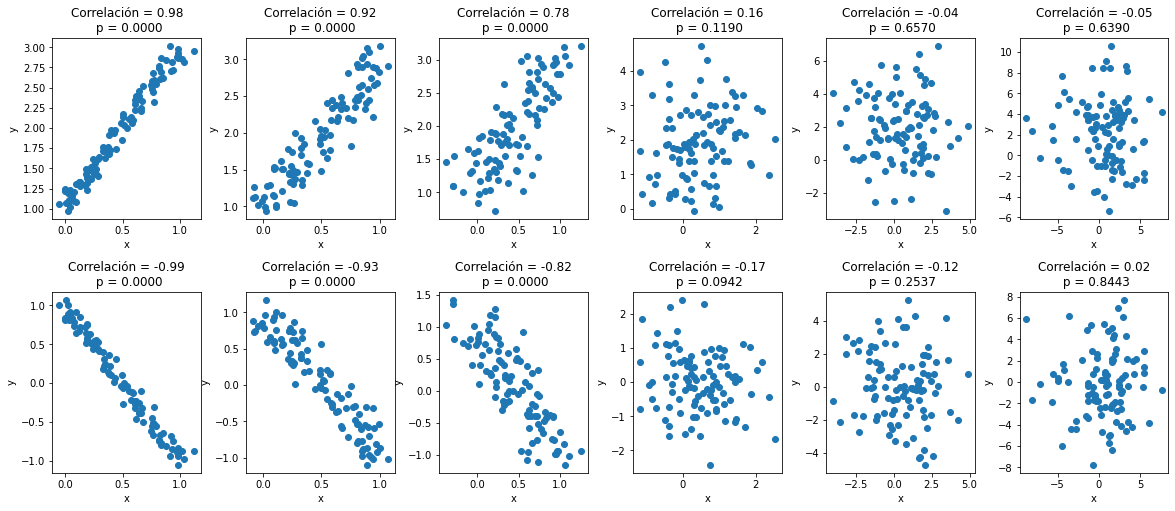

In [ ]:
#@title Distintos grados de correlación

from scipy.stats import pearsonr, spearmanr

seed = 13
rand = np.random.RandomState(seed)

x = rand.uniform(0,1,100)
x = np.vstack((x,x*2+1))
x = np.vstack((x,-x[0,]*2+1))
x = np.vstack((x,rand.normal(1,3,100)))

def correlate(matrix, corr=pearsonr):
    rows, cols = matrix.shape[0], matrix.shape[1]
    r = np.ones(shape=(rows, rows))
    p = np.ones(shape=(rows, rows))
    for i in range(rows):
        for j in range(i+1, rows):
            r_, p_ = corr(matrix[i], matrix[j])
            r[i, j] = r[j, i] = r_
            p[i, j] = p[j, i] = p_
            
    return r, p

fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20, 8))

for e, i in zip([0.05,0.1,0.2,0.8,2,3], [0,1,2,3,4,5]):

    x_e = x+rand.normal(0,e,x.shape)

    r, p = correlate(x_e)
    
    # Plot column wise. Positive correlation in row 0 and negative in row 1
    ax[0,i].scatter(x_e[0,], x_e[1,])
    ax[1,i].scatter(x_e[0,], x_e[2,])
    ax[0,i].title.set_text('Correlación = ' + "{:.2f}".format(r[0,1])
                        + '\n p = ' + "{:.4f}".format(p[0,1]) )
    ax[1,i].title.set_text('Correlación = ' + "{:.2f}".format(r[0,2])
                        + '\n p = ' + "{:.4f}".format(p[0,2]))
    ax[0,i].set(xlabel='x',ylabel='y')    
    ax[1,i].set(xlabel='x',ylabel='y')
    
fig.subplots_adjust(wspace=0.3,hspace=0.4)    
plt.show()

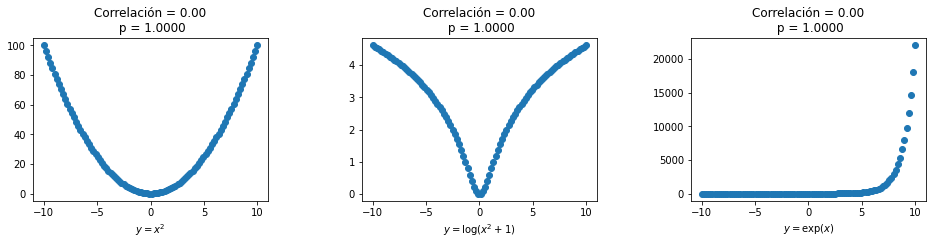

In [ ]:
#@title Caso No lineal

x_nonlinear = np.linspace(-10,10,100)
x_nonlinear = np.vstack((x_nonlinear,x_nonlinear*x_nonlinear))
x_nonlinear = np.vstack((x_nonlinear,np.log(x_nonlinear[0,]**2+1)))
x_nonlinear = np.vstack((x_nonlinear,np.exp(x_nonlinear[0,])))

r,p = correlate(x_nonlinear)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 3))
title = ['$y=x^2$', '$y=\log(x^2+1)$','$y=\exp(x)$']
for i in [0,1,2]:
    ax[i].scatter(x_nonlinear[0,],x_nonlinear[1+i,])
    ax[i].title.set_text('Correlación = ' + "{:.2f}".format(r[0,2])
                        + '\n p = ' + "{:.4f}".format(p[0,2]))
    
    ax[i].set(xlabel=title[i])

fig.subplots_adjust(wspace=.4)    
plt.show()

# MyPersonality

La prueba Big5 (Costa y Mac Crae 1985, Goldberg et al. 2006) es una taxonomía o clasificación de rasgos de personalidad que analiza la composición de cinco dimensiones de personalidad en su sentido más amplio. Esta disertación se publicó en el Psychological Review, 41, 1-32. Los cinco factores son:

- Apertura a la experiencia (inventivo / curioso vs. consistente / cauteloso) O  
- Escrupulosidad (eficiente / organizado vs. extravagante / descuidado) C  
- Extraversión (sociable / enérgico vs. solitario / reservado) E  
- Amabilidad (amigable / compasivo vs. desafiante / insensible) A  
- Neuroticismo (susceptible / nervioso vs. resistente / seguro) N

In [ ]:
import pandas as pd
import plotly.express as px
from scipy.stats import pearsonr

In [ ]:
df = pd.read_csv('https://unket.s3-sa-east-1.amazonaws.com/data/mypersonality.csv')

In [ ]:
df = df.drop_duplicates(subset='#AUTHID')

In [ ]:
df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,06/19/09 03:21 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.10
102,318bf822d4f2bd3920367560218619c0,has bed bugs..... ewwwww!,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,06/27/09 11:21 PM,318.0,49024.8,97.88,0.02,49584.0,0.49,0.06
171,ecbddbfe00e0f83cfdb802a7186061c7,"is stuck on Band-Aid brand, cuz Band-Aid's stu...",4.30,2.15,3.60,3.30,4.10,y,n,y,n,y,06/28/09 05:03 AM,739.0,267574.0,98.39,0.01,270029.0,0.50,0.07
236,db39f7b2aad360b1033ec1f8fcd57f9c,Back from vacation and tired,4.65,3.20,3.05,3.65,4.75,y,y,n,y,y,07/15/09 10:59 PM,102.0,4359.8,86.33,0.09,4668.0,0.46,0.36
246,4d035bd3fd8d9595d15cea9e388964be,had a great day at church...,3.70,2.90,3.40,3.35,4.05,y,y,n,n,y,07/19/09 05:40 PM,57.0,1509.5,98.02,0.05,1522.0,0.49,0.03


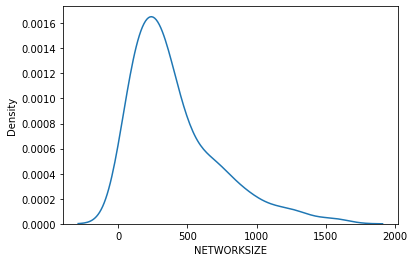

In [ ]:
sns.kdeplot(df['NETWORKSIZE']);

In [ ]:
np.median(cantidades_de_amigos)

315.0

In [ ]:
pearsonr(df['sEXT'], df['NETWORKSIZE'])

(0.3621394116038834, 3.664654662842724e-09)

In [ ]:
f'{3.664654662842724e-09:.10f}'

'0.0000000037'

In [ ]:
pearsonr(df['sNEU'], df['NETWORKSIZE'])

(-0.18020241658633415, 0.004257725510543998)

In [ ]:
pearsonr(df['sAGR'], df['NETWORKSIZE'])

(0.11133128697465432, 0.07892697855400191)

In [ ]:
fig = px.scatter(df, x="sEXT", y="NETWORKSIZE", trendline="ols", trendline_color_override='red')
fig.show();